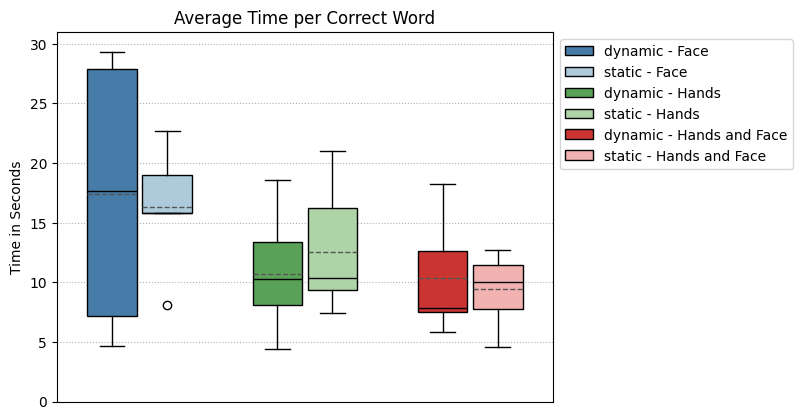

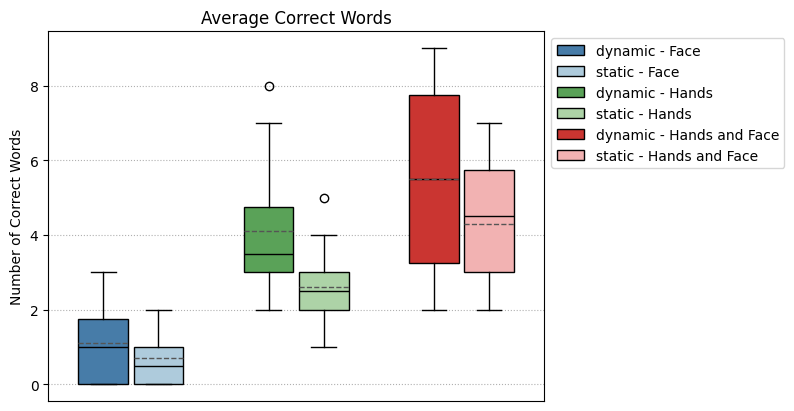

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

DARK_RED    = '#ca3531'
DARK_GREEN  = '#5aa258'
DARK_BLUE   = '#477ca8'
LIGHT_RED   = '#f2b2b2'
LIGHT_GREEN = '#add3a7'
LIGHT_BLUE  = '#aecbdc'

color_mapping = {
    ('hand+face', 'animated'): DARK_RED,
    ('hand+face', 'static'): LIGHT_RED,

    ('hand', 'animated'): DARK_GREEN,
    ('hand', 'static'): LIGHT_GREEN,

    ('face', 'animated'): DARK_BLUE,
    ('face', 'static'): LIGHT_BLUE,
}

label_mapping = {
    ('hand+face', 'animated'): 'dynamic - Hands and Face',
    ('hand+face', 'static'): 'static - Hands and Face',

    ('hand', 'animated'): 'dynamic - Hands',
    ('hand', 'static'): 'static - Hands',

    ('face', 'animated'): 'dynamic - Face',
    ('face', 'static'): 'static - Face',
}


files = glob.glob('facetracking-data/*.csv')

aggregated_datas = []
for f in files:
    filename = os.path.basename(f)

    condition_df = pd.read_csv(f, sep=';')
    condition_df['word'].str.strip() # if we have accidental whitespace before or after a word

    # insert participant and condition data, which we parse from the filename
    participant, body_parts, static_or_animated = filename.removesuffix('.csv').split('-')
    condition_df.insert(0, 'participant',        participant)
    condition_df.insert(1, 'visible-body-parts', body_parts)
    condition_df.insert(2, 'static-or-animated', static_or_animated)

    # remove words which the participants didn't get to because of time-out
    condition_df = condition_df[condition_df['time left'] != 30]

    correct_df = condition_df[condition_df['correct']]
    aggregated_data = [participant, body_parts, static_or_animated, correct_df['time left'].mean(), correct_df['correct'].sum()]
    aggregated_datas.append(aggregated_data)

pd.set_option('display.max_rows', None)
# print(df.head())

aggregate_df = pd.DataFrame(data=aggregated_datas, columns=["participant", "visible-body-parts", "static-or-animated", "time-left", "count-correct"])
aggregate_df = aggregate_df.sort_values(['participant', 'visible-body-parts', 'static-or-animated'])
aggregate_df['time-taken'] = 30 - aggregate_df['time-left']
# print(aggregate_df)

meanlineprops = dict(linestyle='--', color='#555')

##### Average Time Per Correct Word #####
i = 0
for condition, data in aggregate_df.groupby(['visible-body-parts', 'static-or-animated']):
    bplot = plt.boxplot(data['time-taken'].dropna(), positions=[i + i // 2], patch_artist=True, widths=0.9, label=label_mapping[condition], showmeans=True, meanline=True, meanprops=meanlineprops)
    bplot['boxes'][0].set_facecolor(color_mapping[condition])
    bplot['medians'][0].set_color('black')
    # print(data['time-taken'])
    i += 1

plt.xlim((-1, 8))
plt.ylim((0, 31))
plt.grid(True, linestyle='dotted', axis='y')
plt.title('Average Time per Correct Word')
plt.ylabel('Time in Seconds')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tick_params(bottom=False)
plt.gca().set_xticklabels([])
plt.savefig('plots/plot-time-per-word.svg', bbox_inches='tight')
plt.show()

##### Average Correct Words #####
i = 0
for condition, data in aggregate_df.groupby(['visible-body-parts', 'static-or-animated']):
    bplot = plt.boxplot(data['count-correct'], positions=[i + i // 2], patch_artist=True, widths=0.9, label=label_mapping[condition], showmeans=True, meanline=True, meanprops=meanlineprops)
    bplot['boxes'][0].set_facecolor(color_mapping[condition])
    bplot['medians'][0].set_color('black')
    i += 1

plt.xlim((-1, 8))
plt.grid(True, linestyle='dotted', axis='y')
plt.title('Average Correct Words')
plt.ylabel('Number of Correct Words')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tick_params(bottom=False)
plt.gca().set_xticklabels([])
plt.savefig('plots/plot-correct-words.svg', bbox_inches='tight')
plt.show()